# Question_2 - Analysis 1
#### Create folder structure on the basis of section name
#### Find out the most published topic in the Article for the year 2010

In [7]:
import glob   
import os   
import csv  
import json
files = glob.glob(r'C:\Users\Manav Desai\Documents\Data_Analytics_using_Python\desai_manav_spring2017\Midterms\Question_2\Article Data\2010\*') 

In [8]:
mno = []
for occur in files:     
    with open(occur, 'r') as f:   
        json_file = json.load(f)
        json_keys = json_file.keys()
        for x in json_keys: 
            if x == 'response':
                response_file = json_file['response']
                response_keys = response_file.keys()
                for y in response_keys:
                    if y == 'docs':
                        docs_file = json_file['response']['docs']
                        i = 0
                        for z in docs_file:
                            section_name = json_file['response']['docs'][i]['section_name']
                            pub_date = json_file['response']['docs'][i]['pub_date'][0:10]
                            id = json_file['response']['docs'][i]['_id']
                            if section_name is not None:
                                a = section_name.replace('  ','')
                                g = a.replace(' ','')
                                b = g.replace(':','')
                                d = b.replace('/','')
                                if d != 'false':
                                    abc.append(section_name)
                                    sectionName = r"Question_2_files\\" + d
                                    presentSection=os.path.isdir(sectionName)
                                    os.makedirs(sectionName, exist_ok=True)   
                                    with open(sectionName+"\\" + pub_date + id + '.json', 'w') as outfile:
                                        json.dump(json_file['response']['docs'][i], outfile)                       
                                    i += 1

In [9]:
from collections import Counter
counts = Counter(mno)

In [10]:
dictionary_count= dict(counts)

In [11]:
dictionary_list = []
temp = []
for key, value in dict_count.items():
    temp = [key,value]
    dictionary_list.append(temp)


In [12]:
for k,v in sorted(dict_count.items(), key =lambda x:x[1:] , reverse = True):
    x=  print(k, v)

Business Day 527
Sports 428
U.S. 327
World 288
N.Y. / Region 274
Arts 260
Opinion 229
Fashion & Style 109
Books 89
Health 79
Technology 63
Movies 61
Dining & Wine 56
Science 47
Theater 47
Travel 41
Real Estate 41
Magazine 37
Home & Garden 27
Corrections 19
Education 15
Business 15
Style 14
Week in Review 14
Automobiles 13
Great Homes & Destinations 12
Food 11
Multimedia 11
T:Style 11
Crosswords/Games 10
Autos 9
T Magazine 8
Crosswords & Games 7
Your Money 6
UrbanEye 6
Multimedia/Photos 6
Job Market 2
Blogs 2
N.Y./Region 1
Great Homes and Destinations 1
Arts; Books 1
Obituaries; Books 1
Movies; Obituaries 1
Obituaries 1


In [13]:
count=1
with open("freq_analysis"+'.csv','w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(['Word','Rank', 'Frequency'])
    for r in dict_list:
        writer.writerow([r[0],count,r[1]])
        count+=1

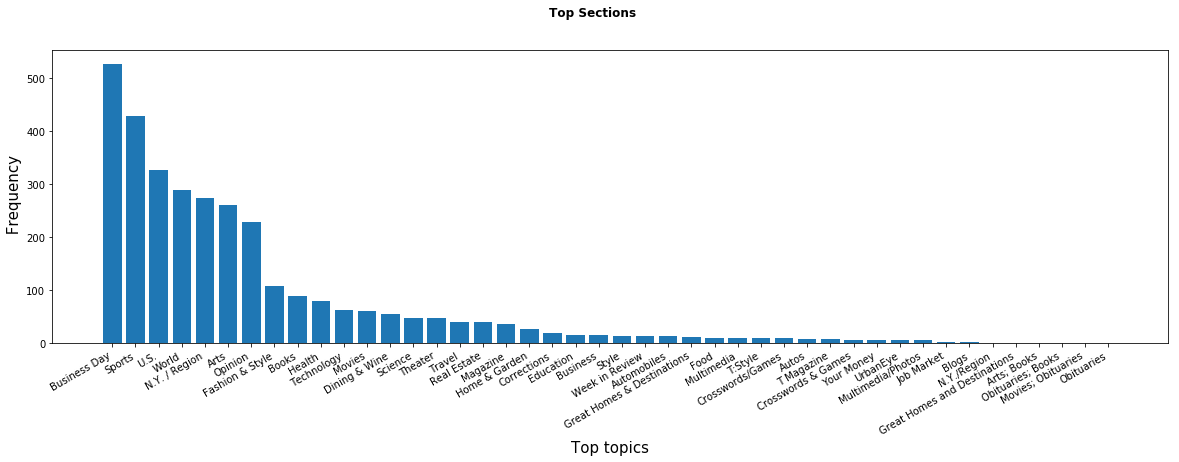

In [15]:
import matplotlib.pyplot as plt
import csv
import operator
freq = {}
with open('freq_analysis.csv') as f:
    reader = csv.DictReader(f)
    i= 0
    for r in reader:
        if i == 55:break
        freq[r['Word']] = int(r['Frequency'])
        i+=1
freq = sorted(freq.items(), key=operator.itemgetter(1), reverse=True)
labels, values = zip(*freq)
plt.bar(range(len(freq)), values, align='center')
plt.xticks(range(len(freq)), labels)
fig = plt.gcf()
fig.set_size_inches(20, 6)
plt.suptitle('Top Sections' , fontsize=12, fontweight='bold')
plt.ylabel(" Frequency", fontsize=15)
plt.xlabel("Top topics", fontsize=15)
fig.autofmt_xdate()
plt.show()